In [202]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from scipy.stats import boxcox
from collections import Counter
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
import warnings

In [203]:
# loading the imdb_full_info_df and inflation_df
imdb_full_info_df = pd.read_csv('imdb_full_info_df.csv')
inflation_df = pd.read_csv('inflation_data.csv')
cast_score_df = pd.read_csv('cast_score_df.csv')

In [204]:
# processing the inflation_df
inflation_df = inflation_df.sort_values('year', ascending=False)
inflation_df.drop(20, axis=0, inplace=True)
inflation_df.reset_index(inplace=True)
inflation_df.drop(columns=['index'], axis=1, inplace=True)

In [205]:
# calculating the compounded inflation rate for each year with 2019 as base year
for i in range(0, len(inflation_df)):
    if i == 0:
        inflation_df['dollar'][i] = 1
    else:
        inflation_df['dollar'][i] = inflation_df['dollar'][i-1]*(1+inflation_df['inflation'][i-1])

C:\Users\Bosco\AppData\Local\Temp/ipykernel_7900/4206754930.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_df['dollar'][i] = 1
C:\Users\Bosco\AppData\Local\Temp/ipykernel_7900/4206754930.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflation_df['dollar'][i] = inflation_df['dollar'][i-1]*(1+inflation_df['inflation'][i-1])


In [206]:
# storing the year and compounded rate in a dictionary
inflation_dict = pd.Series(inflation_df.dollar.values, index=inflation_df.year).to_dict()

In [207]:
# adjusting inflation for budget and worldwide_gross
budget_adj = []
worldwide_gross_adj = []

for i in range(0,len(imdb_full_info_df)):
    release_year = int(imdb_full_info_df['release_date'][i].split('-')[0])
    inflation_comp = inflation_dict[release_year]
    budget_adj.append(round(imdb_full_info_df['budget'][i]*inflation_comp))
    worldwide_gross_adj.append(round(imdb_full_info_df['worldwide_gross'][i]*inflation_comp))

imdb_full_info_df['budget_adj'] = budget_adj
imdb_full_info_df['worldwide_gross_adj'] = worldwide_gross_adj

In [208]:
# adding the cast_score column
imdb_full_info_df['cast_score'] = cast_score_df['cast_score']

In [209]:
imdb_full_info_df

,release_date,budget,domestic_gross,worldwide_gross,title,imdb_rating,cast_1,cast_2,cast_3,movie_url,imdb_id,director,rating_check,runtime,genre,director.1,budget_adj,worldwide_gross_adj,cast_score
0,2019-04-23,400000000,858373000,2797800564,Avengers: Endgame,8.4,Robert Downey Jr.,Chris Evans,Mark Ruffalo,https://www.imdb.com/title/tt4154796/,tt4154796,Anthony Russo,8.4,['181'],"['Action', 'Adventure', 'Drama', 'Sci-Fi']",Anthony Russo,400000000,2797800564,761
1,2011-05-20,379000000,241071802,1045713802,Pirates of the Caribbean: On Stranger Tides,6.6,Johnny Depp,Penélope Cruz,Ian McShane,https://www.imdb.com/title/tt1298650/,tt1298650,Rob Marshall,6.6,['137'],"['Action', 'Adventure', 'Fantasy']",Rob Marshall,430707129,1188380976,308
2,2015-04-22,365000000,459005868,1395316979,Avengers: Age of Ultron,7.3,Robert Downey Jr.,Chris Evans,Mark Ruffalo,https://www.imdb.com/title/tt2395427/,tt2395427,Joss Whedon,7.3,['141'],"['Action', 'Adventure', 'Sci-Fi']",Joss Whedon,393679419,1504952267,599
3,2015-12-16,306000000,936662225,2064615817,Star Wars Episode VII: The Force Awakens,7.9,Daisy Ridley,John Boyega,Oscar Isaac,https://www.imdb.com/title/tt2488496/,tt2488496,J.J. Abrams,7.9,['138'],"['Action', 'Adventure', 'Sci-Fi']",J.J. Abrams,330043568,2226840424,0
4,2018-04-25,300000000,678815482,2048359754,Avengers: Infinity War,8.5,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,https://www.imdb.com/title/tt4154756/,tt4154756,Anthony Russo,8.5,['149'],"['Action', 'Adventure', 'Sci-Fi']",Anthony Russo,305280000,2084410886,887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,2011-09-30,5000000,223838,5476793,Tucker & Dale vs. Evil,7.5,Tyler Labine,Alan Tudyk,Katrina Bowden,https://www.imdb.com/title/tt1465522/,tt1465522,Eli Craig,7.5,['89'],"['Comedy', 'Horror']",Eli Craig,5682152,6223994,0
3310,2007-11-16,5000000,65388,861325,Redacted,6.1,Patrick Carroll,Rob Devaney,Izzy Diaz,https://www.imdb.com/title/tt0937237/,tt0937237,Brian De Palma,6.1,['90'],"['Crime', 'Thriller', 'War']",Brian De Palma,6164349,1061902,0
3311,2014-10-17,5000000,56001,584499,Rudderless,7.4,Billy Crudup,Anton Yelchin,Felicity Huffman,https://www.imdb.com/title/tt1798243/,tt1798243,William H. Macy,7.4,['105'],"['Comedy', 'Drama', 'Music']",William H. Macy,5399340,631182,0
3312,2012-05-17,5000000,0,9109597,Mientras duermes,7.2,Luis Tosar,Marta Etura,Alberto San Juan,https://www.imdb.com/title/tt1437358/,tt1437358,Jaume Balagueró,7.2,['102'],"['Crime', 'Drama', 'Thriller']",Jaume Balagueró,5566917,10142474,0


In [210]:
# extracting runtime values
runtime = []
for i in imdb_full_info_df['runtime']:
    runtime.append(int(i[2:][:-2]))
    
imdb_full_info_df['runtime'] = runtime

In [211]:
# extracting year
release_year = []
for i in imdb_full_info_df['release_date']:
    release_year.append(int(i[:4]))
imdb_full_info_df['year'] = release_year

In [212]:
# dropping irrelevant columns
imdb_full_info_df.drop(columns=['release_date', 'domestic_gross', 'title', 'cast_1', 'cast_2', 'cast_3', 'movie_url', 'imdb_id', 'director', 'director.1','rating_check'], inplace=True)
imdb_full_info_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018
...,...,...,...,...,...,...,...,...,...
3309,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011
3310,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007
3311,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,2014
3312,5000000,9109597,7.2,102,"['Crime', 'Drama', 'Thriller']",5566917,10142474,0,2012


### 0. Base Modelling
#### budget-adjusted

In [351]:
def modelling(X, y, z):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)
    std_scaler = StandardScaler().fit(X_train)
    X_train_scaled = std_scaler.transform(X_train)
    X_test_scaled = std_scaler.transform(X_test)
    model = z
    model.fit(X_train_scaled, y_train)
    print('Train score is: '+str(model.score(X_train_scaled, y_train)))
    print('Test score is: '+str(model.score(X_test_scaled, y_test)))
    Adj_R2 = 1-((1-model.score(X_test_scaled, y_test))*(len(y_test)-1)/((len(y_test)-X_test.shape[1]-1)))
    print('Adjusted R2 is: '+str(Adj_R2))
    features_importance = pd.DataFrame(data = {
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
    })
    features_importance = features_importance.sort_values(by='Importance', ascending=False)
    return features_importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 100)
std_scaler = StandardScaler().fit(X_train)
PT(feature, X1_train + X1_test)
replace the transformed column
model.fit

In [352]:
modelling(imdb_full_info_df['budget_adj'].array.reshape(-1, 1), imdb_full_info_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.5491699442943168
Test score is: 0.5376191428960934
Adjusted R2 is: 0.5369196257143931


AttributeError: 'PandasArray' object has no attribute 'columns'

Text(0.5, 1.0, 'worldwide_gross_adj')

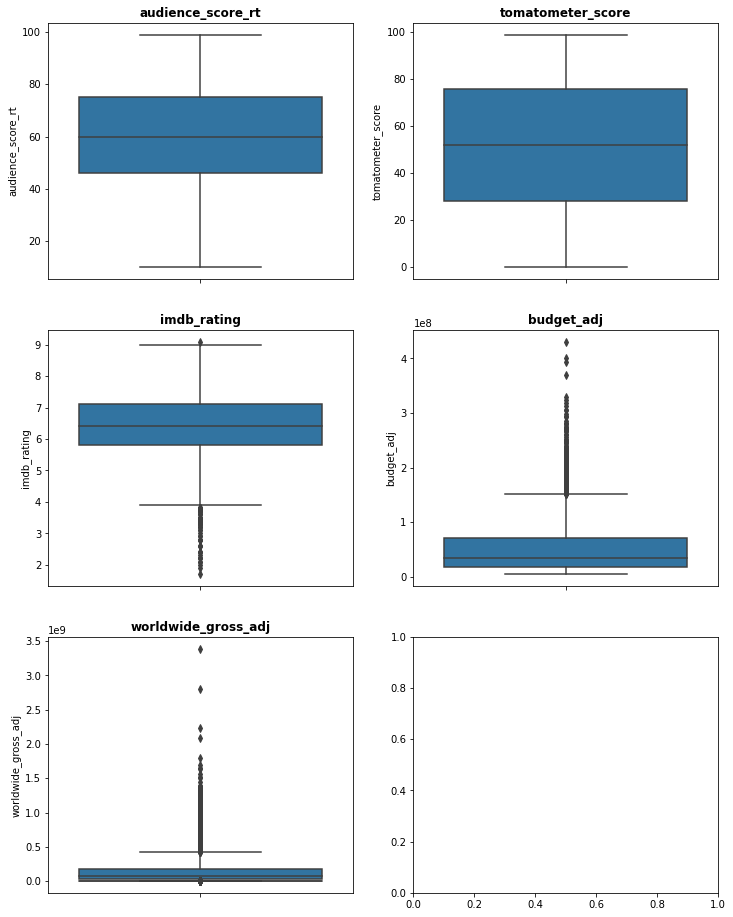

In [346]:
#use boxplot to see outlier distributions on numerical columns
fig2, ax2 = plt.subplots(3,2, figsize=(12,16))
sns.boxplot(y=model3_df['audience_score_rt'], ax = ax2[0,0])
ax2[0,0].set_title('audience_score_rt', fontweight='bold')
sns.boxplot(y=model3_df['tomatometer_score'], ax = ax2[0,1])
ax2[0,1].set_title('tomatometer_score', fontweight='bold')
sns.boxplot(y=model3_df['imdb_rating'], ax = ax2[1,0])
ax2[1,0].set_title('imdb_rating', fontweight='bold')
sns.boxplot(y=model3_df['budget_adj'], ax = ax2[1,1])
ax2[1,1].set_title('budget_adj', fontweight='bold')
sns.boxplot(y=model3_df['cast_score'], ax = ax2[2,0])
ax2[2,0].set_title('cast_score', fontweight='bold')
sns.boxplot(y=model3_df['worldwide_gross_adj'], ax = ax2[2,0])
ax2[2,0].set_title('worldwide_gross_adj', fontweight='bold')

array([[<AxesSubplot:title={'center':'imdb_rating'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'worldwide_gross_adj'}>,
        <AxesSubplot:title={'center':'cast_score'}>],
       [<AxesSubplot:title={'center':'tomatometer_score'}>,
        <AxesSubplot:title={'center':'audience_score_rt'}>,
        <AxesSubplot:title={'center':'Action'}>,
        <AxesSubplot:title={'center':'Adventure'}>,
        <AxesSubplot:title={'center':'Drama'}>],
       [<AxesSubplot:title={'center':'Sci-Fi'}>,
        <AxesSubplot:title={'center':'Fantasy'}>,
        <AxesSubplot:title={'center':'Thriller'}>,
        <AxesSubplot:title={'center':'Animation'}>,
        <AxesSubplot:title={'center':'Family'}>],
       [<AxesSubplot:title={'center':'Musical'}>,
        <AxesSubplot:title={'center':'Comedy'}>,
        <AxesSubplot:title={'center':'Romance'}>,
        <AxesSubplot:title={'center':'Mystery'}>,
      

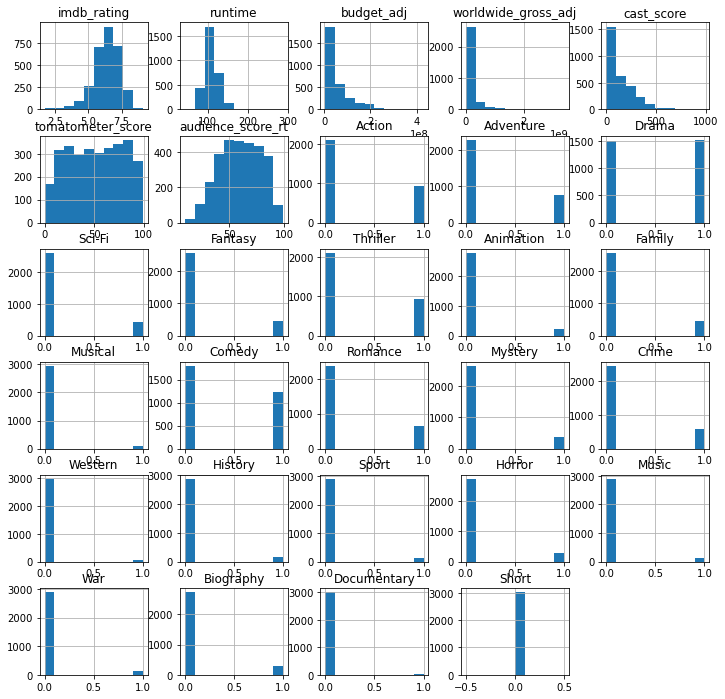

In [350]:
model3_num.hist(figsize=(12,12))

### 1. Modelling - Linear Regression
#### budget-adjusted, imdb-rating, imdb-runtime, imdb-genre, cast-score

In [213]:
imdb_cast_df = imdb_full_info_df[imdb_full_info_df['year']>2000]
imdb_cast_df.reset_index(drop=True, inplace=True)

In [216]:
# one hot encoding for genre (multiple values)
x = imdb_cast_df['genre'].apply(eval)
x = x.apply(Counter)
x = pd.json_normalize(x)
x = x.replace(np.nan, 0)
x = x.astype('int')

In [217]:
# merging two dataframes
model1_df = pd.concat([imdb_cast_df, x], axis=1)
model1_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year,Action,...,Crime,Western,History,Sport,Horror,Music,War,Biography,Documentary,Short
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019,1,...,0,0,0,0,0,0,0,0,0,0
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011,1,...,0,0,0,0,0,0,0,0,0,0
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015,1,...,0,0,0,0,0,0,0,0,0,0
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015,1,...,0,0,0,0,0,0,0,0,0,0
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011,0,...,0,0,0,0,1,0,0,0,0,0
3160,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007,0,...,1,0,0,0,0,0,1,0,0,0
3161,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,2014,0,...,0,0,0,0,0,1,0,0,0,0
3162,5000000,9109597,7.2,102,"['Crime', 'Drama', 'Thriller']",5566917,10142474,0,2012,0,...,1,0,0,0,0,0,0,0,0,0


In [315]:
# NOT USED!!
# one hot encoding for genre (multiple values) - alternative
genre = []
for i in imdb_full_info_df['genre']:
    genre.append((i[2:][:-2]).replace("'","").replace(', ',','))
    
imdb_full_info_df['genre'] = genre

# finding unique values for genre
genre_cat = imdb_full_info_df['genre'].value_counts().reset_index()
genre_cat.head

genre_cat.rename(columns={'index':'genre_name', 'genre':'count'}, inplace=True)

genre_cat['genre_name'] = genre_cat['genre_name'].str.split(',')

df1 = []
for i in range(genre_cat.shape[0]):
    for j in genre_cat['genre_name'][i]:
        df1.append(j)
        
# creating a list of unique genres
list1 = list(set(df1))
list1

# creating a new dataframe with genre columns
df2 = pd.DataFrame(columns=list1)

# merging two dataframes
df3 = pd.concat([imdb_full_info_df, df2], axis=1)
df3

# filling binary values for genre columns
for i in range(0, len(df3)):
    for j in range(0, len(list1)):
        if df3.columns[5+j]in df3['genre'][i]:
            df3[df3.columns[5+j]][i] = 1
        else:
            df3[df3.columns[5+j]][i] = 0

In [218]:
model1_df.drop(['genre', 'budget', 'worldwide_gross'], axis=1, inplace=True)
model1_df

,imdb_rating,runtime,budget_adj,worldwide_gross_adj,cast_score,year,Action,Adventure,Drama,Sci-Fi,...,Crime,Western,History,Sport,Horror,Music,War,Biography,Documentary,Short
0,8.4,181,400000000,2797800564,761,2019,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,6.6,137,430707129,1188380976,308,2011,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7.3,141,393679419,1504952267,599,2015,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,7.9,138,330043568,2226840424,0,2015,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8.5,149,305280000,2084410886,887,2018,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,7.5,89,5682152,6223994,0,2011,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3160,6.1,90,6164349,1061902,0,2007,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3161,7.4,105,5399340,631182,0,2014,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3162,7.2,102,5566917,10142474,0,2012,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [353]:
modelling(model1_df.drop('worldwide_gross_adj', axis=1), model1_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.6283090793441595
Test score is: 0.5937194204812466
Adjusted R2 is: 0.5755878904861949


,Attribute,Importance
2,budget_adj,1.611307e+08
0,imdb_rating,4.917601e+07
7,Drama,2.916704e+07
4,year,1.651120e+07
1,runtime,1.602222e+07
6,Adventure,1.391451e+07
18,Western,1.330684e+07
5,Action,1.313142e+07
21,Horror,1.150644e+07
10,Thriller,1.043989e+07


In [338]:
x.sum()

Action          963
Adventure       789
Drama          1606
Sci-Fi          434
Fantasy         485
Thriller        950
Animation       258
Family          479
Musical          88
Comedy         1276
Romance         689
Mystery         384
Crime           605
Western          49
History         184
Sport           144
Horror          300
Music           144
War             153
Biography       304
Documentary      22
Short             2
dtype: int64

In [221]:
# loading the Rotten Tomatoes data
rt_df = pd.read_csv('year_difference_Biagio_8_march_modif.csv', sep=';')
rt_df

,Unnamed: 0,release_date,budget,domestic_gross,worldwide_gross,title,imdb_rating,cast_1,cast_2,cast_3,runtime,genre,director,tomatometer_score,audience_score_rt,original_language,MPA_Ratings,Year_scraped,release_year,difference
0,0,4/23/2019,400000000,858373000,2797800564,Avengers: Endgame,8.4,Robert Downey Jr.,Chris Evans,Mark Ruffalo,['181'],"['Action', 'Adventure', 'Drama', 'Sci-Fi']",Anthony Russo,94.0,90.0,English,PG-13,2019.0,2019,0.0
1,1,5/20/2011,379000000,241071802,1045713802,Pirates of the Caribbean: On Stranger Tides,6.6,Johnny Depp,Pen√©lope Cruz,Ian McShane,['137'],"['Action', 'Adventure', 'Fantasy']",Rob Marshall,33.0,54.0,English,PG-13,2011.0,2011,0.0
2,2,4/22/2015,365000000,459005868,1395316979,Avengers: Age of Ultron,7.3,Robert Downey Jr.,Chris Evans,Mark Ruffalo,['141'],"['Action', 'Adventure', 'Sci-Fi']",Joss Whedon,76.0,83.0,English,PG-13,2015.0,2015,0.0
3,3,12/16/2015,306000000,936662225,2064615817,Star Wars Episode VII: The Force Awakens,7.9,Daisy Ridley,John Boyega,Oscar Isaac,['138'],"['Action', 'Adventure', 'Sci-Fi']",J.J. Abrams,93.0,85.0,English,PG-13,2015.0,2015,0.0
4,4,4/25/2018,300000000,678815482,2048359754,Avengers: Infinity War,8.5,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,['149'],"['Action', 'Adventure', 'Sci-Fi']",Anthony Russo,85.0,91.0,English,PG-13,2018.0,2018,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,3309,9/30/2011,5000000,223838,5476793,Tucker & Dale vs. Evil,7.5,Tyler Labine,Alan Tudyk,Katrina Bowden,['89'],"['Comedy', 'Horror']",Eli Craig,85.0,85.0,English,R,NaN,2011,NaN
3310,3310,11/16/2007,5000000,65388,861325,Redacted,6.1,Patrick Carroll,Rob Devaney,Izzy Diaz,['90'],"['Crime', 'Thriller', 'War']",Brian De Palma,45.0,45.0,English,R,NaN,2007,NaN
3311,3311,10/17/2014,5000000,56001,584499,Rudderless,7.4,Billy Crudup,Anton Yelchin,Felicity Huffman,['105'],"['Comedy', 'Drama', 'Music']",William H. Macy,64.0,83.0,English,R,NaN,2014,NaN
3312,3312,5/17/2012,5000000,0,9109597,Mientras duermes,7.2,Luis Tosar,Marta Etura,Alberto San Juan,['102'],"['Crime', 'Drama', 'Thriller']",Jaume Balaguer√≥,91.0,78.0,Spanish,NaN,NaN,2012,NaN


### 2. Modelling - Linear Regression
#### budget-adjusted, imdb-rating, imdb-runtime, rt-critic-rating, rt-audience-rating

In [246]:
rt2_df = rt_df[['tomatometer_score', 'audience_score_rt']]
rt2_df

,tomatometer_score,audience_score_rt
0,94.0,90.0
1,33.0,54.0
2,76.0,83.0
3,93.0,85.0
4,85.0,91.0
...,...,...
3309,85.0,85.0
3310,45.0,45.0
3311,64.0,83.0
3312,91.0,78.0


In [247]:
model2_df = pd.concat([imdb_full_info_df, rt2_df], axis=1)
model2_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year,tomatometer_score,audience_score_rt
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019,94.0,90.0
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011,33.0,54.0
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015,76.0,83.0
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015,93.0,85.0
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018,85.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...
3309,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011,85.0,85.0
3310,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007,45.0,45.0
3311,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,2014,64.0,83.0
3312,5000000,9109597,7.2,102,"['Crime', 'Drama', 'Thriller']",5566917,10142474,0,2012,91.0,78.0


In [248]:
model2_df.dropna(inplace=True)

In [250]:
model2_df = model2_df[model2_df['year']>2000]
model2_df.drop(columns=['year'], inplace=True)
model2_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,tomatometer_score,audience_score_rt
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,94.0,90.0
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,33.0,54.0
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,76.0,83.0
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,93.0,85.0
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,85.0,91.0
...,...,...,...,...,...,...,...,...,...,...
3308,5000000,2015004,7.3,136,"['Biography', 'Drama', 'History']",6164349,2484238,0,47.0,71.0
3309,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,85.0,85.0
3310,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,45.0,45.0
3311,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,64.0,83.0


In [251]:
model2_df = model2_df.drop(['genre', 'budget', 'worldwide_gross'], axis=1)
model2_df

,imdb_rating,runtime,budget_adj,worldwide_gross_adj,cast_score,tomatometer_score,audience_score_rt
0,8.4,181,400000000,2797800564,761,94.0,90.0
1,6.6,137,430707129,1188380976,308,33.0,54.0
2,7.3,141,393679419,1504952267,599,76.0,83.0
3,7.9,138,330043568,2226840424,0,93.0,85.0
4,8.5,149,305280000,2084410886,887,85.0,91.0
...,...,...,...,...,...,...,...
3308,7.3,136,6164349,2484238,0,47.0,71.0
3309,7.5,89,5682152,6223994,0,85.0,85.0
3310,6.1,90,6164349,1061902,0,45.0,45.0
3311,7.4,105,5399340,631182,0,64.0,83.0


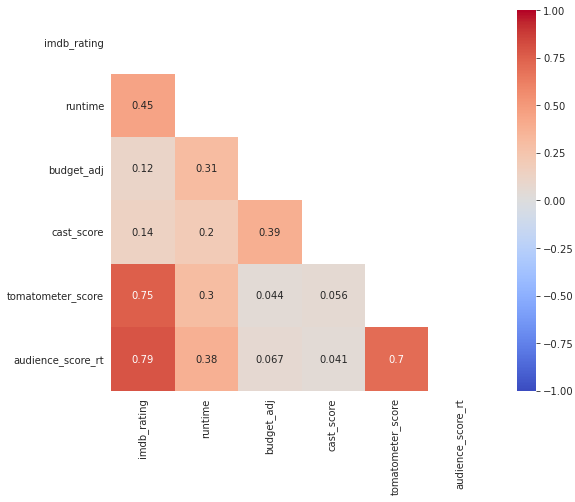

In [252]:
# checking multicollinearity
corr = model2_df.drop('worldwide_gross_adj', axis=1).corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [253]:
modelling(model2_df.drop('worldwide_gross_adj', axis=1), model2_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.5974037254071896
Test score is: 0.5866339605230976
Adjusted R2 is: 0.5826206980039044


,Attribute,Importance
2,budget_adj,1.808219e+08
5,audience_score_rt,3.146073e+07
4,tomatometer_score,2.316298e+07
3,cast_score,1.052390e+07
1,runtime,3.982093e+06
0,imdb_rating,2.920664e+06


### 2.1 Modelling - Linear Regression (Investigating The Ratings)
#### budget-adjusted, imdb-rating/rt-critic-rating/ rt-audience-rating

In [254]:
model2_1_df = model2_df[['budget_adj', 'imdb_rating']]

In [255]:
modelling(model2_1_df, model2_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.5847459489403691
Test score is: 0.564200403825466
Adjusted R2 is: 0.5627991189503068


,Attribute,Importance
0,budget_adj,1.817854e+08
1,imdb_rating,4.480593e+07


In [256]:
model2_2_df = model2_df[['budget_adj', 'audience_score_rt']]

In [257]:
modelling(model2_2_df, model2_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.5908472777000581
Test score is: 0.5785188702501911
Adjusted R2 is: 0.5771636254599988


,Attribute,Importance
0,budget_adj,1.840397e+08
1,audience_score_rt,4.872997e+07


In [258]:
model2_3_df = model2_df[['budget_adj', 'tomatometer_score']]

In [259]:
modelling(model2_3_df, model2_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.587823378370312
Test score is: 0.5682612383450572
Adjusted R2 is: 0.5668730108156199


,Attribute,Importance
0,budget_adj,1.848937e+08
1,tomatometer_score,4.667833e+07


### 3. Modelling - Linear Regression
#### budget-adjusted, imdb-rating, imdb-runtime, imdb-genre, rt-critic-rating, rt-audience-rating, cast-score

In [269]:
model3_df = pd.concat([imdb_full_info_df, rt2_df], axis=1)

In [272]:
model3_df = model3_df[model3_df['year']>2000]

In [273]:
model3_df.isna().sum()

budget                  0
worldwide_gross         0
imdb_rating             0
runtime                 0
genre                   0
budget_adj              0
worldwide_gross_adj     0
cast_score              0
year                    0
tomatometer_score      38
audience_score_rt       9
dtype: int64

In [276]:
model3_df = pd.concat([model3_df, x], axis=1)

In [277]:
model3_df.dropna(inplace=True)

In [280]:
model3_df.columns

Index(['budget', 'worldwide_gross', 'imdb_rating', 'runtime', 'genre',
       'budget_adj', 'worldwide_gross_adj', 'cast_score', 'year',
       'tomatometer_score', 'audience_score_rt', 'Action', 'Adventure',
       'Drama', 'Sci-Fi', 'Fantasy', 'Thriller', 'Animation', 'Family',
       'Musical', 'Comedy', 'Romance', 'Mystery', 'Crime', 'Western',
       'History', 'Sport', 'Horror', 'Music', 'War', 'Biography',
       'Documentary', 'Short'],
      dtype='object')

In [334]:
x.sum()

Action          963
Adventure       789
Drama          1606
Sci-Fi          434
Fantasy         485
Thriller        950
Animation       258
Family          479
Musical          88
Comedy         1276
Romance         689
Mystery         384
Crime           605
Western          49
History         184
Sport           144
Horror          300
Music           144
War             153
Biography       304
Documentary      22
Short             2
dtype: int64

In [283]:
modelling(model3_df.drop(['worldwide_gross', 'worldwide_gross_adj', 'budget', 'genre', 'year'], axis=1), model3_df['worldwide_gross_adj'], LinearRegression())

Train score is: 0.603915314462413
Test score is: 0.5690204515852957
Adjusted R2 is: 0.5477375109228412


,Attribute,Importance
2,budget_adj,1.823361e+08
5,audience_score_rt,3.073515e+07
4,tomatometer_score,2.607521e+07
15,Comedy,1.369890e+07
3,cast_score,1.109822e+07
8,Drama,1.017446e+07
22,Horror,6.526727e+06
6,Action,5.853116e+06
14,Musical,5.590441e+06
1,runtime,5.363700e+06


### 4. Modelling - Linear Regression
#### budget-adjusted, imdb-rating, imdb-runtime, imdb-genre, rt-critic-rating, rt-audience-rating, rt-language, rt-mpa-rating

In [284]:
# checking categories of MPA_Ratings
rt_df['MPA_Ratings'].value_counts().index

Index(['PG-13', 'R', 'PG', 'G', 'NC-17', 'TVMA', 'PG ', 'NR', 'PG_13'], dtype='object')

In [285]:
# removing space inide string
rt_df['MPA_Ratings'] = rt_df['MPA_Ratings'].str.strip()

In [286]:
# standardizing data
rt_df['MPA_Ratings'].replace({'PG_13':'PG-13'}, inplace=True)

In [287]:
rt_df['MPA_Ratings'].value_counts()

PG-13    1328
R        1286
PG        501
G          76
NC-17       3
TVMA        2
NR          1
Name: MPA_Ratings, dtype: int64

In [288]:
rt3_df = rt_df[['tomatometer_score', 'audience_score_rt', 'original_language', 'MPA_Ratings']]

In [322]:
# merging two dataframes
model3_df = pd.concat([imdb_full_info_df, rt3_df], axis=1)
model3_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year,tomatometer_score,audience_score_rt,original_language,MPA_Ratings
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019,94.0,90.0,English,PG-13
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011,33.0,54.0,English,PG-13
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015,76.0,83.0,English,PG-13
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015,93.0,85.0,English,PG-13
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018,85.0,91.0,English,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3309,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011,85.0,85.0,English,R
3310,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007,45.0,45.0,English,R
3311,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,2014,64.0,83.0,English,R
3312,5000000,9109597,7.2,102,"['Crime', 'Drama', 'Thriller']",5566917,10142474,0,2012,91.0,78.0,Spanish,NaN


In [323]:
model3_df = model3_df[model3_df['year']>2000]
model3_df.reset_index(drop=True, inplace=True)
model3_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year,tomatometer_score,audience_score_rt,original_language,MPA_Ratings
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019,94.0,90.0,English,PG-13
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011,33.0,54.0,English,PG-13
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015,76.0,83.0,English,PG-13
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015,93.0,85.0,English,PG-13
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018,85.0,91.0,English,PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011,85.0,85.0,English,R
3160,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007,45.0,45.0,English,R
3161,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,2014,64.0,83.0,English,R
3162,5000000,9109597,7.2,102,"['Crime', 'Drama', 'Thriller']",5566917,10142474,0,2012,91.0,78.0,Spanish,NaN


In [325]:
# merging two dataframes
model3_df = pd.concat([model3_df, x], axis=1)
model3_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year,tomatometer_score,...,Crime,Western,History,Sport,Horror,Music,War,Biography,Documentary,Short
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019,94.0,...,0,0,0,0,0,0,0,0,0,0
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011,33.0,...,0,0,0,0,0,0,0,0,0,0
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015,76.0,...,0,0,0,0,0,0,0,0,0,0
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015,93.0,...,0,0,0,0,0,0,0,0,0,0
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018,85.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011,85.0,...,0,0,0,0,1,0,0,0,0,0
3160,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007,45.0,...,1,0,0,0,0,0,1,0,0,0
3161,5000000,584499,7.4,105,"['Comedy', 'Drama', 'Music']",5399340,631182,0,2014,64.0,...,0,0,0,0,0,1,0,0,0,0
3162,5000000,9109597,7.2,102,"['Crime', 'Drama', 'Thriller']",5566917,10142474,0,2012,91.0,...,1,0,0,0,0,0,0,0,0,0


In [326]:
model3_df.dropna(inplace=True)
model3_df.reset_index(drop=True, inplace=True)
model3_df

,budget,worldwide_gross,imdb_rating,runtime,genre,budget_adj,worldwide_gross_adj,cast_score,year,tomatometer_score,...,Crime,Western,History,Sport,Horror,Music,War,Biography,Documentary,Short
0,400000000,2797800564,8.4,181,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",400000000,2797800564,761,2019,94.0,...,0,0,0,0,0,0,0,0,0,0
1,379000000,1045713802,6.6,137,"['Action', 'Adventure', 'Fantasy']",430707129,1188380976,308,2011,33.0,...,0,0,0,0,0,0,0,0,0,0
2,365000000,1395316979,7.3,141,"['Action', 'Adventure', 'Sci-Fi']",393679419,1504952267,599,2015,76.0,...,0,0,0,0,0,0,0,0,0,0
3,306000000,2064615817,7.9,138,"['Action', 'Adventure', 'Sci-Fi']",330043568,2226840424,0,2015,93.0,...,0,0,0,0,0,0,0,0,0,0
4,300000000,2048359754,8.5,149,"['Action', 'Adventure', 'Sci-Fi']",305280000,2084410886,887,2018,85.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,5000000,1075009,6.4,96,"['Crime', 'Drama', 'Romance', 'Western']",5486810,1179674,142,2013,77.0,...,1,1,0,0,0,0,0,0,0,0
3029,5000000,927074,5.7,118,"['Biography', 'Drama', 'Music']",5399340,1001118,84,2014,67.0,...,0,0,0,0,0,1,0,1,0,0
3030,5000000,5476793,7.5,89,"['Comedy', 'Horror']",5682152,6223994,0,2011,85.0,...,0,0,0,0,1,0,0,0,0,0
3031,5000000,861325,6.1,90,"['Crime', 'Thriller', 'War']",6164349,1061902,0,2007,45.0,...,1,0,0,0,0,0,1,0,0,0


In [327]:
model3_df.drop(columns=['genre', 'worldwide_gross', 'budget', 'year'], axis=1, inplace=True)
model3_df

,imdb_rating,runtime,budget_adj,worldwide_gross_adj,cast_score,tomatometer_score,audience_score_rt,original_language,MPA_Ratings,Action,...,Crime,Western,History,Sport,Horror,Music,War,Biography,Documentary,Short
0,8.4,181,400000000,2797800564,761,94.0,90.0,English,PG-13,1,...,0,0,0,0,0,0,0,0,0,0
1,6.6,137,430707129,1188380976,308,33.0,54.0,English,PG-13,1,...,0,0,0,0,0,0,0,0,0,0
2,7.3,141,393679419,1504952267,599,76.0,83.0,English,PG-13,1,...,0,0,0,0,0,0,0,0,0,0
3,7.9,138,330043568,2226840424,0,93.0,85.0,English,PG-13,1,...,0,0,0,0,0,0,0,0,0,0
4,8.5,149,305280000,2084410886,887,85.0,91.0,English,PG-13,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,6.4,96,5486810,1179674,142,77.0,61.0,English,R,0,...,1,1,0,0,0,0,0,0,0,0
3029,5.7,118,5399340,1001118,84,67.0,36.0,English,R,0,...,0,0,0,0,0,1,0,1,0,0
3030,7.5,89,5682152,6223994,0,85.0,85.0,English,R,0,...,0,0,0,0,1,0,0,0,0,0
3031,6.1,90,6164349,1061902,0,45.0,45.0,English,R,0,...,1,0,0,0,0,0,1,0,0,0


In [328]:
model3_num = model3_df._get_numeric_data()
model3_num.columns

Index(['imdb_rating', 'runtime', 'budget_adj', 'worldwide_gross_adj',
       'cast_score', 'tomatometer_score', 'audience_score_rt', 'Action',
       'Adventure', 'Drama', 'Sci-Fi', 'Fantasy', 'Thriller', 'Animation',
       'Family', 'Musical', 'Comedy', 'Romance', 'Mystery', 'Crime', 'Western',
       'History', 'Sport', 'Horror', 'Music', 'War', 'Biography',
       'Documentary', 'Short'],
      dtype='object')

In [329]:
model3_cat = model3_df.select_dtypes('object')
model3_cat.columns

Index(['original_language', 'MPA_Ratings'], dtype='object')

In [330]:
model3_cat = pd.get_dummies(model3_cat, drop_first=True)
model3_cat

,original_language_Aramaic,original_language_Bosnian,original_language_Catalan,original_language_Chinese,original_language_Czech,original_language_Danish,original_language_Dutch,original_language_English,original_language_English (Australia),original_language_English (United Kingdom),...,original_language_Spanish (Spain),original_language_Swedish,original_language_Tamil,original_language_Thai,original_language_Unknown language,MPA_Ratings_NC-17,MPA_Ratings_PG,MPA_Ratings_PG-13,MPA_Ratings_R,MPA_Ratings_TVMA
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3029,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3030,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3031,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [331]:
model3_combined = pd.concat([model3_num, model3_cat], axis=1)
model3_combined

,imdb_rating,runtime,budget_adj,worldwide_gross_adj,cast_score,tomatometer_score,audience_score_rt,Action,Adventure,Drama,...,original_language_Spanish (Spain),original_language_Swedish,original_language_Tamil,original_language_Thai,original_language_Unknown language,MPA_Ratings_NC-17,MPA_Ratings_PG,MPA_Ratings_PG-13,MPA_Ratings_R,MPA_Ratings_TVMA
0,8.4,181,400000000,2797800564,761,94.0,90.0,1,1,1,...,0,0,0,0,0,0,0,1,0,0
1,6.6,137,430707129,1188380976,308,33.0,54.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
2,7.3,141,393679419,1504952267,599,76.0,83.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,7.9,138,330043568,2226840424,0,93.0,85.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
4,8.5,149,305280000,2084410886,887,85.0,91.0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3028,6.4,96,5486810,1179674,142,77.0,61.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3029,5.7,118,5399340,1001118,84,67.0,36.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3030,7.5,89,5682152,6223994,0,85.0,85.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3031,6.1,90,6164349,1061902,0,45.0,45.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [332]:
modelling(model3_combined.drop('worldwide_gross_adj', axis=1), model3_combined['worldwide_gross_adj'], LinearRegression())

Train score is: 0.6407398110867152
Test score is: 0.6036362441643615
Adjusted R2 is: 0.5608840291839179


,Attribute,Importance
27,Short,8.695569e+19
2,budget_adj,1.548902e+08
8,Drama,3.323598e+07
5,audience_score_rt,2.960069e+07
4,tomatometer_score,1.969210e+07
0,imdb_rating,1.873014e+07
1,runtime,1.841245e+07
6,Action,1.620842e+07
22,Horror,1.534113e+07
28,original_language_Aramaic,1.447497e+07
